<a href="https://colab.research.google.com/github/mikeraymond7/MachineLearning/blob/main/Copy_of_Project_2_Alternative_Masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt**

HarperCollins participates in Amazon’s subscription program, KindleUnlimited (KU). For this exercise you’ll be working with performance data for titles that have been in KU —a book read through KU is called a borrow, and for each title, you have borrowed units by date. Titles are generally rotated on a quarterly basis but some titles stay in for multiple quarters—you have a few quarters of performance data.  **bold text**

In addition to the data for KU titles, you also have supporting data for each title that was in KU:

- whether each title, for each quarter the title was in KU, was simultaneously in Prime Reading, a program that allows Prime members to borrow titles that participate in the program.
- The quarter is identified by “quarter_start_date”  
- average daily Amazon sales (units sold outside of KU and subscription programs) for the preceding 90 days of each title preceding its KU participation for each quarter.
- the first and last day a title was in KU. A title was in KU continuously in this time.   
- genre information


Section 1: Warm up  

Which titles in the dataset had the highest daily rate of borrows in the quarter of April 1, 2019 through June 30, 2019? Provide the top 5 titles and their borrow rates for the quarter.   


Section 2: Recommendations

The business team in charge of nominating titles for KU needs some help in selecting the next round of titles. They want to understand the relationship between different title characteristics and borrow rates, what title characteristics drive borrow rates, and how to pick the next batch of titles so that they maximize potential borrows. What insights and recommendations would you share based on the data you’ve been given?   

# **Provided Data and Conversion to DataFrame**

In [ ]:
import pandas as pd

In [ ]:
titles = pd.read_csv('https://www.dropbox.com/s/asgjb0cq0zxo6i2/data_science_challenge_ku_titles_data%5B3%5D%20%281%29.csv?raw=1')

borrows = pd.read_csv('https://www.dropbox.com/s/o2w78u9r3r2qq9e/data_science_challenge_ku_borrows%5B3%5D%20%281%29.csv?raw=1')

In [ ]:
titles

,title_id,quarter_start_date,first_day_in_KU,last_day_in_KU,avg_units_sold_in_preceding_90_days,active_in_prime_reading,genre
0,0,4/1/18,4/1/18,6/30/19,1.422222,0,nonfiction
1,0,7/1/18,4/1/18,6/30/19,1.145455,1,nonfiction
2,0,10/1/18,4/1/18,6/30/19,0.855556,1,nonfiction
3,0,1/1/19,4/1/18,6/30/19,0.755556,1,nonfiction
4,0,4/1/19,4/1/18,6/30/19,0.600000,1,nonfiction
...,...,...,...,...,...,...,...
2900,1577,4/1/18,4/20/18,6/30/19,2.600000,0,other fiction
2901,1577,7/1/18,4/20/18,6/30/19,5.766667,0,other fiction
2902,1577,10/1/18,4/20/18,6/30/19,0.955556,0,other fiction
2903,1577,1/1/19,4/20/18,6/30/19,0.577778,1,other fiction


In [ ]:
borrows

,title_id,Date,ku_borrows
0,0,4/21/18,3.0
1,0,4/22/18,6.0
2,0,4/23/18,1.0
3,0,4/24/18,0.0
4,0,4/25/18,3.0
...,...,...,...
222937,1577,6/26/19,28.0
222938,1577,6/27/19,26.0
222939,1577,6/28/19,34.0
222940,1577,6/29/19,22.0


# **Section 1: Warm Up**

Which titles in the dataset had the highest daily rate of borrows in the quarter of April 1, 2019 through June 30, 2019? Provide the top 5 titles and their borrow rates for the quarter.

In [ ]:
import datetime
# Modify Dates to be numerical
def to_yyyymmdd(date):
  split_date = date.split('/')
  mm = int(split_date[0])
  dd = int(split_date[1])
  if len(split_date[2]) >= 4:
    split_date[2] = split_date[2][2:4]
  yy = int(split_date[2])
  new_date = datetime.datetime(yy,mm,dd)
  return int(new_date.strftime("%y%m%d"))
#print(to_yyyymmdd('4/16/19'))
borrows['Date'] = borrows['Date'].map(to_yyyymmdd)

In [ ]:
# Count borrows per title and divide by number of entries
# All titles are split by day, so number of entries == number of days
before = borrows.loc[borrows['Date'] <= 190630]
between = before.loc[before['Date'] >= 190401]
group_borrows = between.groupby('title_id')['ku_borrows']
daily_borrows = group_borrows.sum() / group_borrows.count()

In [ ]:
daily_borrows.sort_values(ascending = False)[:5]

title_id
670     280.959184
1576    127.462963
1575    112.870370
1577    110.822222
118     103.175824
Name: ku_borrows, dtype: float64

# **Section 2: Recommendations**

The business team in charge of nominating titles for KU needs some help in selecting the next round of titles. They want to understand the relationship between different title characteristics and borrow rates, what title characteristics drive borrow rates, and how to pick the next batch of titles so that they maximize potential borrows. What insights and recommendations would you share based on the data you’ve been given?   

In [ ]:
import numpy as np
import pandas as p
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Clean and Trim Data**

In [ ]:
titles

,title_id,quarter_start_date,first_day_in_KU,last_day_in_KU,avg_units_sold_in_preceding_90_days,active_in_prime_reading,genre
0,0,4/1/18,4/1/18,6/30/19,1.422222,0,nonfiction
1,0,7/1/18,4/1/18,6/30/19,1.145455,1,nonfiction
2,0,10/1/18,4/1/18,6/30/19,0.855556,1,nonfiction
3,0,1/1/19,4/1/18,6/30/19,0.755556,1,nonfiction
4,0,4/1/19,4/1/18,6/30/19,0.600000,1,nonfiction
...,...,...,...,...,...,...,...
2900,1577,4/1/18,4/20/18,6/30/19,2.600000,0,other fiction
2901,1577,7/1/18,4/20/18,6/30/19,5.766667,0,other fiction
2902,1577,10/1/18,4/20/18,6/30/19,0.955556,0,other fiction
2903,1577,1/1/19,4/20/18,6/30/19,0.577778,1,other fiction


In [ ]:
group_borrows = borrows.groupby('title_id')['ku_borrows']
daily_borrows = group_borrows.sum() / group_borrows.count()
daily_borrows.describe()

count    1578.000000
mean        3.813644
std        21.997132
min         0.000000
25%         0.833678
50%         1.098316
75%         1.713045
max       583.366667
Name: ku_borrows, dtype: float64

In [ ]:
p95 = daily_borrows.quantile(0.95)
p5 = daily_borrows.quantile(0.05)
trim_borrows = daily_borrows.copy()
trim_borrows.loc[daily_borrows > p95] = p95
trim_borrows.loc[daily_borrows < p5] = p5
trim_borrows.describe()

count    1578.000000
mean        1.687993
std         1.541767
min         0.596800
25%         0.833678
50%         1.098316
75%         1.713045
max         6.805960
Name: ku_borrows, dtype: float64

In [ ]:
# titles['avg_units_sold_in_preceding_90_days'] contains nan
t = titles.copy()
t[t.isna().any(axis=1)]
# seems like na is just 0 and reported as null or not enough data collected
# will turn into 0.05 percentile in next section
df = pd.concat([t.loc[t['title_id'] == 306],t.loc[t['title_id'] == 1073],t.loc[t['title_id'] == 1475]])
df

,title_id,quarter_start_date,first_day_in_KU,last_day_in_KU,avg_units_sold_in_preceding_90_days,active_in_prime_reading,genre
557,306,4/1/19,4/6/19,6/30/19,NaN,0,nonfiction
1870,1073,1/1/19,1/4/19,6/30/19,0.155556,0,nonfiction
1871,1073,4/1/19,1/4/19,6/30/19,NaN,0,nonfiction
2615,1475,4/1/18,6/1/18,6/30/19,0.322222,0,other fiction
2616,1475,7/1/18,6/1/18,6/30/19,0.177778,0,other fiction
2617,1475,10/1/18,6/1/18,6/30/19,NaN,0,other fiction
2618,1475,1/1/19,6/1/18,6/30/19,0.222222,0,other fiction
2619,1475,4/1/19,6/1/18,6/30/19,0.211111,0,other fiction


In [ ]:
avg90 = t[['avg_units_sold_in_preceding_90_days']].copy()
q95 = avg90['avg_units_sold_in_preceding_90_days'].quantile(0.95)
q5 = avg90['avg_units_sold_in_preceding_90_days'].quantile(0.05)
avg90.loc[avg90['avg_units_sold_in_preceding_90_days'] > q95] = q95
avg90.loc[avg90['avg_units_sold_in_preceding_90_days'] < q5] = q5
avg90 = avg90.fillna(trim_borrows.min())
t[['avg_units_sold_in_preceding_90_days']] = avg90
#t.loc[t['title_id'] == 306]

## **Standard Plot Analysis**

### **Plotting Premium Subscription Vs Preceding 90 Days**

<Axes: xlabel='active_in_prime_reading'>

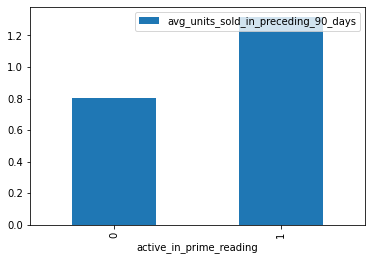

In [ ]:
# Look into filtering out best-seller type books to ensure that the data isn't misleading
# Best-seller type books tend to be premium books, and they sell more because of the book itself and not because it is a prime subscription book
prime = t[['avg_units_sold_in_preceding_90_days','active_in_prime_reading']]
prime.groupby('active_in_prime_reading').mean().plot(kind='bar')

### **Plotting Genre Vs Preceding 90 Days**

<Axes: xlabel='genre'>

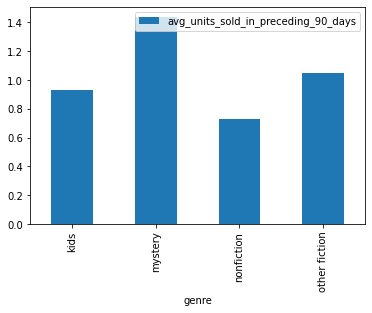

In [ ]:
genre = t[['avg_units_sold_in_preceding_90_days','genre']]
genre.groupby('genre').mean().plot(kind='bar')


### **Mystery Books Active in Prime Reading Vs. Preceding 90 Days**

<Axes: xlabel='genre'>

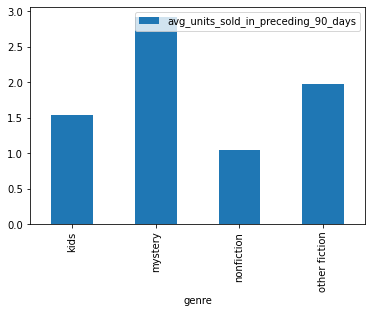

In [ ]:
mystery = t[['avg_units_sold_in_preceding_90_days','genre','active_in_prime_reading']]
mystery[['avg_units_sold_in_preceding_90_days','genre']].loc[mystery['active_in_prime_reading']==1].groupby('genre').mean().plot(kind='bar')

<Axes: xlabel='genre'>

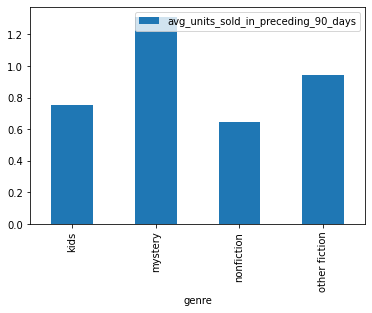

In [ ]:
mystery[['avg_units_sold_in_preceding_90_days','genre']].loc[mystery['active_in_prime_reading']==0].groupby('genre').mean().plot(kind='bar')

In [ ]:
mystery[['genre','avg_units_sold_in_preceding_90_days']].loc[mystery['active_in_prime_reading']==0].groupby('genre').mean() / mystery[['genre','avg_units_sold_in_preceding_90_days']].loc[mystery['active_in_prime_reading']==1].groupby('genre').mean()

,avg_units_sold_in_preceding_90_days
genre,
kids,0.490044
mystery,0.449239
nonfiction,0.623242
other fiction,0.477179



### **Plotting Genres Vs Daily Earnings**

In [ ]:
dup_genres = t[['title_id', 'genre']]
genres = dup_genres.drop_duplicates()
genres.describe()

,title_id
count,1570.000000
mean,788.874522
std,456.392064
min,0.000000
25%,393.250000
50%,790.500000
75%,1184.750000
max,1577.000000


In [ ]:
# Can now plot daily_rates compared to genres
change = 0
missing_rates = {}
for i,key in enumerate(genres.title_id):
  if i + change != key:
    #print(key-1)
    change+=1
    missing_rates[key-1] = daily_borrows.get(key-1)
missing_rates

for key in missing_rates.keys():
  titles.loc[titles['title_id']==key]
daily_cleaned = trim_borrows.drop(labels = missing_rates.keys())
daily_cleaned
genres

,title_id,genre
0,0,nonfiction
5,1,nonfiction
7,2,nonfiction
8,3,nonfiction
9,4,nonfiction
...,...,...
2892,1573,kids
2893,1574,nonfiction
2898,1575,other fiction
2899,1576,other fiction


In [ ]:
genres['avg_daily_borrows'] = daily_cleaned.values
genres

<ipython-input-90-2ccdc55de54c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['avg_daily_borrows'] = daily_cleaned.values


,title_id,genre,avg_daily_borrows
0,0,nonfiction,6.532258
5,1,nonfiction,6.805960
7,2,nonfiction,3.045977
8,3,nonfiction,1.012195
9,4,nonfiction,1.258824
...,...,...,...
2892,1573,kids,2.476744
2893,1574,nonfiction,6.805960
2898,1575,other fiction,6.805960
2899,1576,other fiction,6.805960


array([<Axes: title={'center': 'avg_daily_borrows'}, xlabel='genre'>],
      dtype=object)

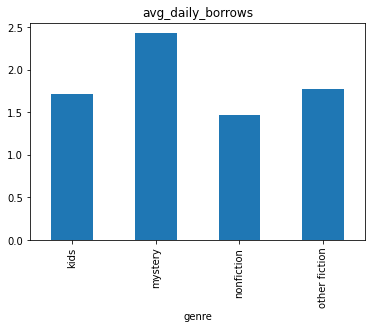

In [ ]:
genres.groupby('genre')['avg_daily_borrows'].mean().plot(kind='bar', subplots=True)

## **Time Series Analysis**

### **Prepare Data for Time Analysis**

In [ ]:
import datetime
# Modify Dates to be numerical
def to_datetime(date):
  split_date = date.split('/')
  mm = int(split_date[0])
  dd = int(split_date[1])
  if len(split_date[2]) >= 4:
    split_date[2] = split_date[2][2:4]
  yy = int(split_date[2])+2000
  new_date = datetime.datetime(yy,mm,dd)
  return new_date
print(to_datetime('4/16/19'))

2019-04-16 00:00:00


In [ ]:
time_borrows = pd.read_csv('https://www.dropbox.com/s/o2w78u9r3r2qq9e/data_science_challenge_ku_borrows%5B3%5D%20%281%29.csv?raw=1')
#time_borrows['Date'] = pd.to_datetime(time_borrows['Date'].map(to_datetime))
time_borrows['Date'] = pd.to_datetime(time_borrows['Date'].map(to_datetime),format='%Y-%m-%d')
time_borrows.set_index('Date', inplace=True)

sales = time_borrows['ku_borrows'].copy()
print(sales.max()) # 2830

p95 = sales.quantile(0.95)
p5 = sales.quantile(0.05)
sales.loc[sales > p95] = p95
sales.loc[sales < p5] = p5
print(p95,p5) # 8.0 0.0
trim_time_borrows = time_borrows.copy()
trim_time_borrows['ku_borrows'] = sales.copy()
trim_time_borrows

2830.0
8.0 0.0


,title_id,ku_borrows
Date,,
2018-04-21,0,3.0
2018-04-22,0,6.0
2018-04-23,0,1.0
2018-04-24,0,0.0
2018-04-25,0,3.0
...,...,...
2019-06-26,1577,8.0
2019-06-27,1577,8.0
2019-06-28,1577,8.0


### **Conduct Analysis**

#### **Daily Sales With Outliers**

[Text(17652, 0, 'May 2018'),
 Text(17683, 0, 'June 2018'),
 Text(17713, 0, 'July 2018'),
 Text(17744, 0, 'August 2018'),
 Text(17775, 0, 'September 2018'),
 Text(17805, 0, 'October 2018'),
 Text(17836, 0, 'November 2018'),
 Text(17866, 0, 'December 2018'),
 Text(17897, 0, 'January 2019'),
 Text(17928, 0, 'February 2019'),
 Text(17956, 0, 'March 2019'),
 Text(17987, 0, 'April 2019'),
 Text(18017, 0, 'May 2019'),
 Text(18048, 0, 'June 2019')]

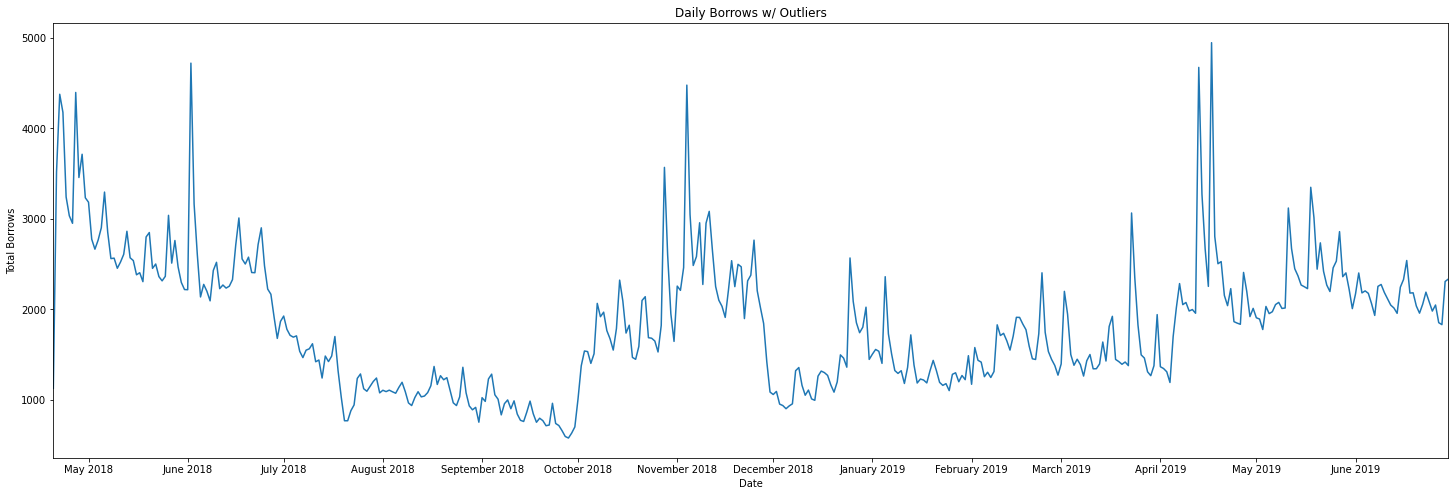

In [ ]:
daily_sales = time_borrows['ku_borrows'].resample('D').sum()
fig,ax = plt.subplots(figsize=(25,8))
daily_sales.plot(ax=ax)
ax.set(title='Daily Borrows w/ Outliers', xlabel='Date', ylabel='Total Borrows')
months = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='MS')
ax.set_xticks(months)
ax.set_xticklabels(months.strftime('%B %Y'))

#### **Daily Sales Without Outliers**

[Text(17652, 0, 'May 2018'),
 Text(17683, 0, 'June 2018'),
 Text(17713, 0, 'July 2018'),
 Text(17744, 0, 'August 2018'),
 Text(17775, 0, 'September 2018'),
 Text(17805, 0, 'October 2018'),
 Text(17836, 0, 'November 2018'),
 Text(17866, 0, 'December 2018'),
 Text(17897, 0, 'January 2019'),
 Text(17928, 0, 'February 2019'),
 Text(17956, 0, 'March 2019'),
 Text(17987, 0, 'April 2019'),
 Text(18017, 0, 'May 2019'),
 Text(18048, 0, 'June 2019')]

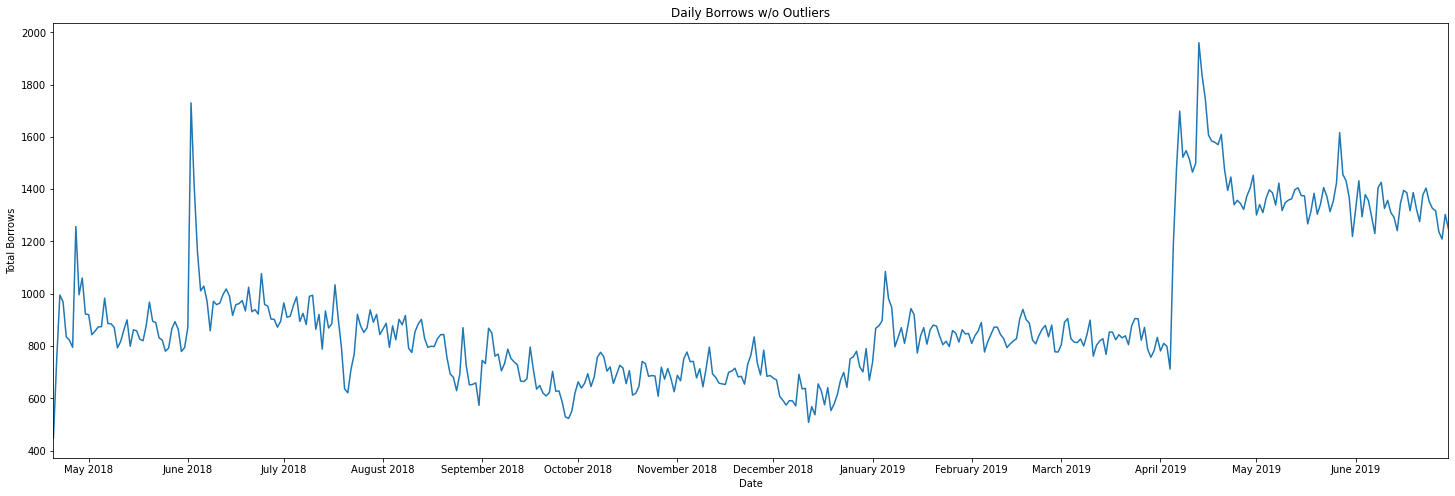

In [ ]:
daily_sales = trim_time_borrows['ku_borrows'].resample('D').sum()
fig,ax = plt.subplots(figsize=(25,8))
daily_sales.plot(ax=ax)
ax.set(title='Daily Borrows w/o Outliers', xlabel='Date', ylabel='Total Borrows')
months = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='MS')
ax.set_xticks(months)
ax.set_xticklabels(months.strftime('%B %Y'))

#### **Weekly Sales With Outliers**

<Axes: xlabel='Weekday'>

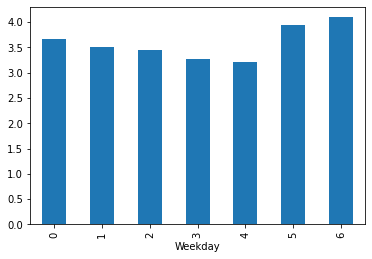

In [ ]:
time_borrows['Weekday'] = time_borrows.index.map(lambda dt:dt.weekday())
time_borrows.groupby('Weekday')['ku_borrows'].mean().plot(kind='bar')

#### **Weekly Sales Without Outliers**

<Axes: xlabel='Weekday'>

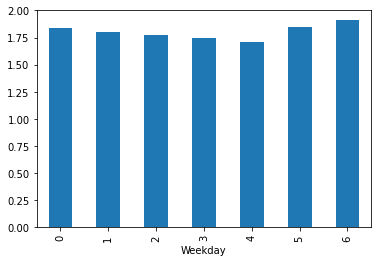

In [ ]:
trim_time_borrows['Weekday'] = trim_time_borrows.index.map(lambda dt:dt.weekday())
trim_time_borrows.groupby('Weekday')['ku_borrows'].mean().plot(kind='bar')
#weekday 0 is Monday --> most borrows on Sunday, least borrows on Friday
#for weekly seasonality, release books at midnight on Saturday to maximize borrows

#### **Monthly Sales With Outliers**

[Text(580, 0, 'May 2018'),
 Text(581, 0, 'June 2018'),
 Text(582, 0, 'July 2018'),
 Text(583, 0, 'August 2018'),
 Text(584, 0, 'September 2018'),
 Text(585, 0, 'October 2018'),
 Text(586, 0, 'November 2018'),
 Text(587, 0, 'December 2018'),
 Text(588, 0, 'January 2019'),
 Text(589, 0, 'February 2019'),
 Text(590, 0, 'March 2019'),
 Text(591, 0, 'April 2019'),
 Text(592, 0, 'May 2019'),
 Text(593, 0, 'June 2019')]

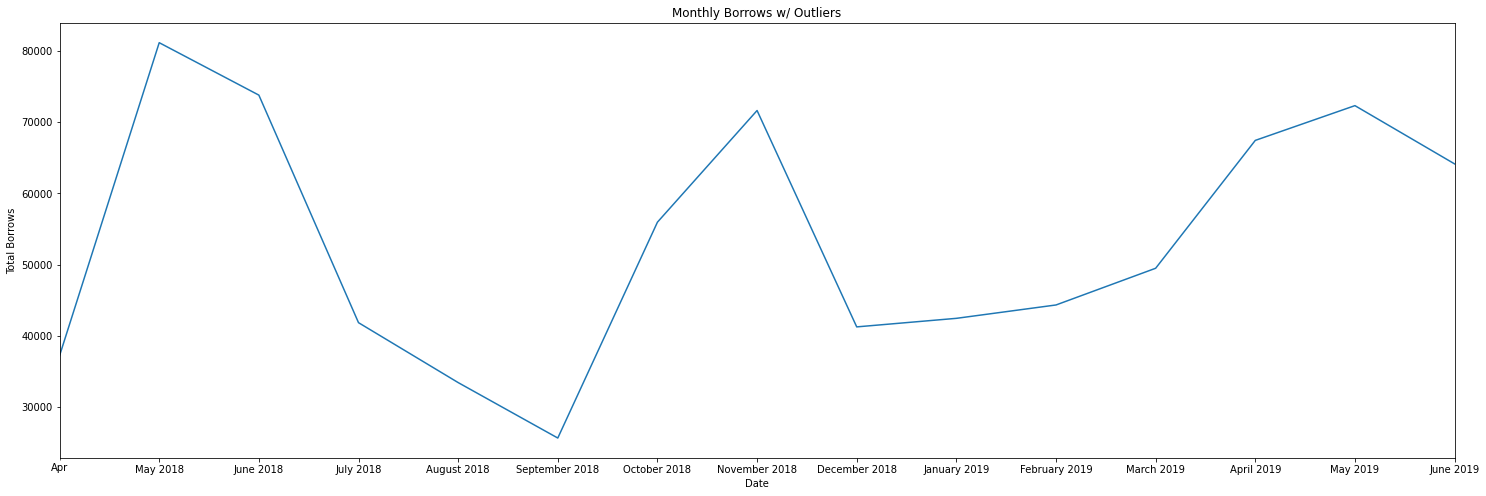

In [ ]:
monthly_sales = time_borrows['ku_borrows'].resample('M').sum()
fig,ax = plt.subplots(figsize=(25,8))
monthly_sales.plot(ax=ax)
ax.set(title='Monthly Borrows w/ Outliers', xlabel='Date', ylabel='Total Borrows')
months = pd.date_range(start=monthly_sales.index.min(), end=monthly_sales.index.max(), freq='MS')
ax.set_xticks(months)
ax.set_xticklabels(months.strftime('%B %Y'))

#### **Monthly Sales Without Outliers**

[Text(580, 0, 'May 2018'),
 Text(581, 0, 'June 2018'),
 Text(582, 0, 'July 2018'),
 Text(583, 0, 'August 2018'),
 Text(584, 0, 'September 2018'),
 Text(585, 0, 'October 2018'),
 Text(586, 0, 'November 2018'),
 Text(587, 0, 'December 2018'),
 Text(588, 0, 'January 2019'),
 Text(589, 0, 'February 2019'),
 Text(590, 0, 'March 2019'),
 Text(591, 0, 'April 2019'),
 Text(592, 0, 'May 2019'),
 Text(593, 0, 'June 2019')]

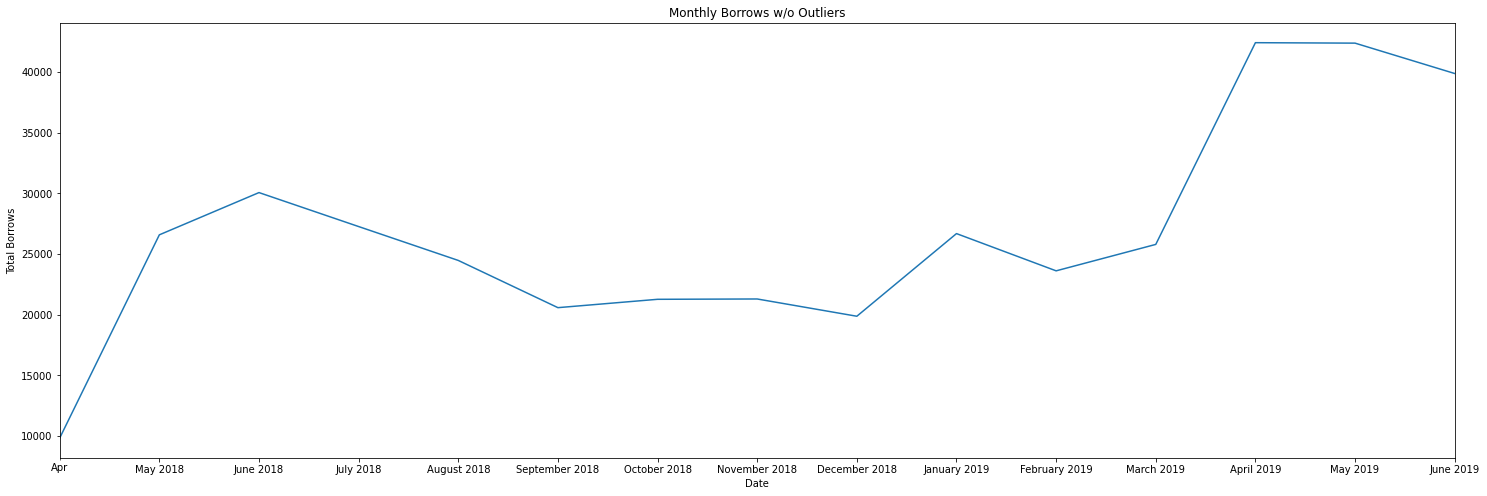

In [ ]:
monthly_sales = trim_time_borrows['ku_borrows'].resample('M').sum()
fig,ax = plt.subplots(figsize=(25,8))
monthly_sales.plot(ax=ax)
ax.set(title='Monthly Borrows w/o Outliers', xlabel='Date', ylabel='Total Borrows')
months = pd.date_range(start=monthly_sales.index.min(), end=monthly_sales.index.max(), freq='MS')
ax.set_xticks(months)
ax.set_xticklabels(months.strftime('%B %Y'))

#### **Holiday Sales With Outliers**

In [ ]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

# create a US federal holiday calendar
calendar = USFederalHolidayCalendar()

# get the holidays for 2018
holidays = calendar.holidays(start='2018-01-01', end='2023-12-31')
print(holidays)

DatetimeIndex(['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
               '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25',
               '2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25',
               '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11',
               '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18',
               '2021-02-15', '2021-05-31', '2021-06-18', '2021-07-05',
               '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25',
               '2021-12-24', '2021-12-31', '2022-01-17', '2022-02-21',
               '2022-05-30', '2022-06-20', '2022-07-04', '2022-09-05',
               '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-26',
               '2023-01-02', '2023-01-16', '2023-02-20', '2023-05-29',
      

<Axes: xlabel='Holidays'>

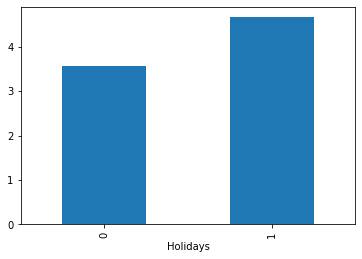

In [ ]:
time_borrows['Holidays'] = 0
time_borrows.loc[time_borrows.index.isin(holidays), 'Holidays'] = 1

time_borrows.groupby('Holidays')['ku_borrows'].mean().plot(kind='bar')

#### **Holiday Sales Without Outliers**



<Axes: xlabel='Holidays'>

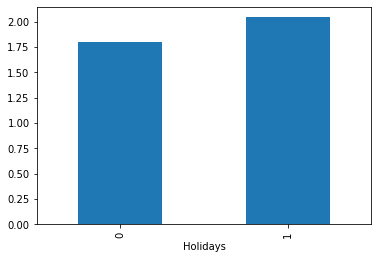

In [ ]:
trim_time_borrows['Holidays'] = 0
trim_time_borrows.loc[trim_time_borrows.index.isin(holidays), 'Holidays'] = 1

trim_time_borrows.groupby('Holidays')['ku_borrows'].mean().plot(kind='bar')
#for holiday seasonality, books at midnight right before a holiday to maximize borrows

#### **Genre vs. Holiday With Outliers**



In [ ]:
df2 = t.groupby('title_id').head(1).set_index('title_id')['genre'].to_dict()
time_borrows['genre'] = time_borrows['title_id'].map(df2)
genre_holiday = time_borrows.groupby(['genre', 'Holidays'])
result = genre_holiday[['ku_borrows','genre','Holidays']].mean()
print(result)

                        ku_borrows  Holidays
genre         Holidays                      
kids          0           4.067051       0.0
              1           7.705618       1.0
mystery       0           5.150858       0.0
              1           4.840095       1.0
nonfiction    0           2.817822       0.0
              1           3.579856       1.0
other fiction 0           4.352937       0.0
              1           5.837251       1.0


#### **Genre vs. Holiday Without Outliers**

In [ ]:
trim_time_borrows['genre'] = trim_time_borrows['title_id'].map(df2)
genre_holiday = trim_time_borrows.groupby(['genre', 'Holidays'])
#result = genre_holiday.mean()
result = genre_holiday[['ku_borrows','genre','Holidays']].mean()
print(result)

                        ku_borrows  Holidays
genre         Holidays                      
kids          0           2.163385       0.0
              1           2.743820       1.0
mystery       0           2.098713       0.0
              1           2.109785       1.0
nonfiction    0           1.645420       0.0
              1           1.874820       1.0
other fiction 0           1.844750       0.0
              1           2.132911       1.0


#### **Genre vs. Weekday Without Outliers**

In [ ]:
df2 = t.groupby('title_id').head(1).set_index('title_id')['genre'].to_dict()
trim_time_borrows['genre'] = trim_time_borrows['title_id'].map(df2)

In [ ]:
genre_weekday = trim_time_borrows.groupby(['genre', 'Weekday'])
result = genre_weekday[['ku_borrows','genre']].mean()
print(result)

                       ku_borrows
genre         Weekday            
kids          0          2.204833
              1          2.231424
              2          2.197589
              3          2.134197
              4          1.991297
              5          2.146348
              6          2.312876
mystery       0          2.123677
              1          2.060676
              2          2.043032
              3          2.008284
              4          2.001294
              5          2.216875
              6          2.232894
nonfiction    0          1.690321
              1          1.651969
              2          1.621305
              3          1.584846
              4          1.556824
              5          1.691640
              6          1.755076
other fiction 0          1.865657
              1          1.843255
              2          1.809667
              3          1.815649
              4          1.800512
              5          1.895201
              

<AxesSubplot:xlabel='Weekday'>

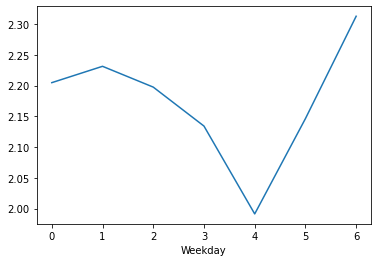

In [ ]:
result.loc['kids']['ku_borrows'].plot()

<AxesSubplot:xlabel='Weekday'>

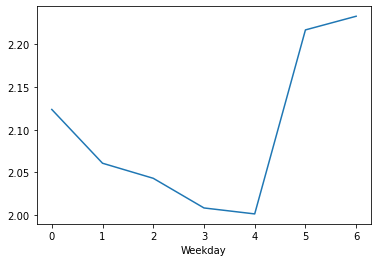

In [ ]:
result.loc['mystery']['ku_borrows'].plot()

<AxesSubplot:xlabel='Weekday'>

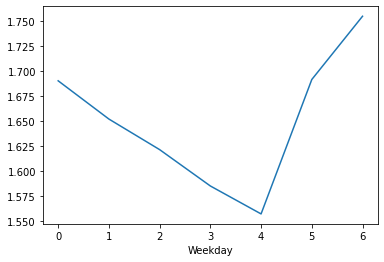

In [ ]:
result.loc['nonfiction']['ku_borrows'].plot()

<AxesSubplot:xlabel='Weekday'>

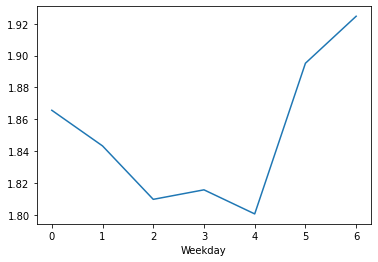

In [ ]:
result.loc['other fiction']['ku_borrows'].plot()

## **Merge trim_borrows and t**

In [ ]:
#Merge trim_borrows with t (which is the copy of titles but with the cleaned values)
merged_df = pd.merge(trim_borrows, t, on='title_id')
merged_df

,title_id,ku_borrows,quarter_start_date,first_day_in_KU,last_day_in_KU,avg_units_sold_in_preceding_90_days,active_in_prime_reading,genre
0,0,6.532258,4/1/18,4/1/18,6/30/19,1.422222,0,nonfiction
1,0,6.532258,7/1/18,4/1/18,6/30/19,1.145455,1,nonfiction
2,0,6.532258,10/1/18,4/1/18,6/30/19,0.855556,1,nonfiction
3,0,6.532258,1/1/19,4/1/18,6/30/19,0.755556,1,nonfiction
4,0,6.532258,4/1/19,4/1/18,6/30/19,0.600000,1,nonfiction
...,...,...,...,...,...,...,...,...
2900,1577,6.805960,4/1/18,4/20/18,6/30/19,2.600000,0,other fiction
2901,1577,6.805960,7/1/18,4/20/18,6/30/19,3.566667,0,other fiction
2902,1577,6.805960,10/1/18,4/20/18,6/30/19,0.955556,0,other fiction
2903,1577,6.805960,1/1/19,4/20/18,6/30/19,0.577778,1,other fiction


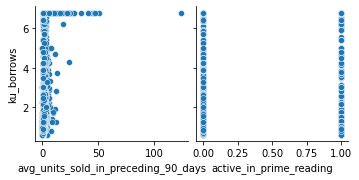

In [ ]:
#Check to see if their is a linear relationship between the independent variables and the dependent variable
import seaborn as sns

# Create scatter plots of each feature against the target variable
sns.pairplot(merged_df, x_vars=['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading'], y_vars=['ku_borrows'], kind='scatter')

# Seems like we can only use multiple linear regression model for avg_units_sold_in_preceding_90_days.
# active_in_prime_reading doesn't have a linear relationship with ku_borrows

## **Implement Multiple Linear Regression**
Equation: Borrows = β0 + (β1 * avg_units_sold_90) + (β2 * active_in_prime_reading) + (β3 * Genre) + e

In [ ]:
# # Define independent and dependent variables
# X = merged_df[['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading', 'genre']].values.reshape(-1,1)
# y = merged_df['ku_borrows'].values.reshape(-1,1)
# print(y)

[[1.422222222 0 'nonfiction']
 [1.145454545 1 'nonfiction']
 [0.855555556 1 'nonfiction']
 ...
 [0.955555556 0 'other fiction']
 [0.577777778 1 'other fiction']
 [16.16393443 1 'other fiction']]


In [ ]:
# Split the merged DataFrame into X and y arrays
# X = merged_df[['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading']].values
# y = merged_df['ku_borrows'].values
# print(X)

[[ 1.42222222  0.        ]
 [ 1.14545454  1.        ]
 [ 0.85555556  1.        ]
 ...
 [ 0.95555556  0.        ]
 [ 0.57777778  1.        ]
 [16.16393443  1.        ]]


In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) #80% in train data, 20% in test data
#error because borrows has 222942 values and titles has 2905 values

In [ ]:
num_df = merged_df[['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading']]
cat_df = merged_df['genre']
y = merged_df['ku_borrows']

In [ ]:
# Splitting the data into training and testing sets
X_train_num, X_test_num, y_train, y_test = train_test_split(num_df, y, test_size=0.2, random_state=1)
X_train_cat, X_test_cat, y_train, y_test = train_test_split(cat_df, y, test_size=0.2, random_state=1)

In [ ]:
# One-hot encoding categorical variables
X_train_cat = pd.get_dummies(X_train_cat)
X_test_cat = pd.get_dummies(X_test_cat)
print(X_train_cat)

      kids  mystery  nonfiction  other fiction
397      0        0           1              0
817      0        0           1              0
2640     0        0           1              0
2297     0        0           1              0
2901     0        0           0              1
...    ...      ...         ...            ...
2763     0        0           1              0
905      0        0           1              0
1096     0        0           1              0
235      0        0           1              0
1061     0        0           1              0

[2324 rows x 4 columns]


In [ ]:
# Combining numerical and encoded categorical variables
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
print(X_train)

      avg_units_sold_in_preceding_90_days  active_in_prime_reading  kids  \
397                              0.171429                        0     0   
817                              0.055556                        0     0   
2640                             0.244444                        0     0   
2297                             0.155556                        1     0   
2901                             3.566667                        0     0   
...                                   ...                      ...   ...   
2763                             1.277778                        1     0   
905                              0.344444                        0     0   
1096                             0.211111                        0     0   
235                              1.688889                        1     0   
1061                             0.044444                        0     0   

      mystery  nonfiction  other fiction  
397         0           1              0  
8

In [ ]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
x = merged_df[['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading', 'genre']]
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(x, regressor.coef_))

# Intercept:  0.7822052565209192
# Coefficients:
# [('avg_units_sold_in_preceding_90_days', 1.0439873973082667),
#  ('active_in_prime_reading', 1.6505814027262713),
#  ('genre', 0.10432240983709365)]

# Equation: borrows = 0.7822 + (1.0439 * avg_units_sold_in_preceding_90_days) + (1.6505 * active_in_prime_reading)
#                     (0.1043 * genre) + e
# If we keep everything the same, the borrows would be 0.7822
# active_in_prime_reading has more weight and affects the borrow rate more than avg_units_sold_in_preceding_90_days

Intercept:  0.7822052565209192
Coefficients:


[('avg_units_sold_in_preceding_90_days', 1.0439873973082667),
 ('active_in_prime_reading', 1.6505814027262713),
 ('genre', 0.10432240983709365)]

In [ ]:
#Prediction of test set
y_pred = regressor.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1.98513984 1.02235146 2.53771499 6.24040848 1.38194712 2.95470403
 0.72075511 0.71502505 0.85770271 1.25434866 3.72922912 2.85128071
 3.85611858 2.73093217 1.22365937 1.49045615 2.49893497 1.00957694
 0.85137962 2.42065326 4.4600203  4.58982708 0.85995342 2.62653343
 4.36311114 1.81114194 1.46314614 4.58982708 0.91046315 2.11684858
 4.28191212 2.42933581 2.73430669 4.05623352 0.85995342 1.04555118
 1.31866656 5.15941318 2.84693077 0.68595553 2.2089117  1.43096589
 1.45154628 1.4810646  0.68595553 1.17314964 1.03178222 1.43994642
 0.75555469 0.68595553 1.04555118 1.0004172  2.45253553 1.64051856
 1.69925363 2.38585368 0.68595553 0.69755539 0.84835357 1.04026993
 0.69755539 2.60330694 2.23301053 1.09195062 6.26066412 1.02867007
 1.38826572 0.80195413 2.53033326 1.43994642 3.67683943 1.58546334
 1.31234796 4.36311114 1.57386348 0.88315314 2.74253203 6.24040848
 6.1106017  1.22292361 1.35543316 2.9687293  1.08035076 0.85995342
 0.94115244 1.14246035 0.88315314 0.8

In [ ]:
# Calculate the training error
train_preds = regressor.predict(X_train)
train_error = mean_squared_error(y_train, train_preds)

# Calculate the testing error
test_preds = regressor.predict(X_test)
test_error = mean_squared_error(y_test, test_preds)

# Print the errors
print("Training Error:", train_error) # if the training error is better than the testing error, then overfitting is occuring
print("Testing Error:", test_error)   # overfitting prevents accurate predictions

Training Error: 1.3439846630527927
Testing Error: 1.556393371218647


In [ ]:
#Actual value and the predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
regressor_diff.head()

,Actual value,Predicted value
1482,1.195122,1.985140
1145,2.285714,1.022351
2580,2.839817,2.537715
432,3.045977,6.240408
2263,1.107798,1.381947


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared training: {:.2f}'.format(regressor.score(X_train,y_train)*100)) #a percentage, how many points fall on the regression line
print('R squared testing: {:.2f}'.format(regressor.score(X_test,y_test)*100))
print('Mean Absolute Error:', meanAbErr) #the absolute difference between the actual or true values and the predicted values, the closer to 0 the better
print('Mean Square Error:', meanSqErr) #the average of the square of the difference between the original and predicted values of the data, the closer to 0 the better
print('Root Mean Square Error:', rootMeanSqErr) #the standard deviation of the errors which occur when a prediction is made on a dataset, the closer to 0 the better

R squared training: 54.11
R squared testing: 49.82
Mean Absolute Error: 0.7690553435930099
Mean Square Error: 1.556393371218647
Root Mean Square Error: 1.247554957193729


## **Linear Regression From Class**

In [ ]:
trim_time_borrows

,title_id,ku_borrows,Weekday,Holidays,genre
Date,,,,,
2018-04-21,0,3.0,5,0,nonfiction
2018-04-22,0,6.0,6,0,nonfiction
2018-04-23,0,1.0,0,0,nonfiction
2018-04-24,0,0.0,1,0,nonfiction
2018-04-25,0,3.0,2,0,nonfiction
...,...,...,...,...,...
2019-06-26,1577,8.0,2,0,other fiction
2019-06-27,1577,8.0,3,0,other fiction
2019-06-28,1577,8.0,4,0,other fiction


In [ ]:
# Split to training (70%) and testing data (30%)
dftrain = trim_time_borrows.loc[(trim_time_borrows.index<='2019-02-23')]
dftest = trim_time_borrows.loc[(trim_time_borrows.index>'2019-02-23')]

In [ ]:
 df_onebook = dftrain.loc[dftrain.title_id == 0]
 df_onebook[f'ku_borrows_prior{p}d_avg'] = df_onebook['ku_borrows'].rolling(p).mean().shift(1).dropna()
 df_onebook

<ipython-input-103-a3eb7b4b6ab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onebook[f'ku_borrows_prior{p}d_avg'] = df_onebook['ku_borrows'].rolling(p).mean().shift(1).dropna()


,title_id,ku_borrows,Weekday,Holidays,genre,ku_borrows_prior7d_avg
Date,,,,,,
2018-04-21,0,3.0,5,0,nonfiction,NaN
2018-04-22,0,6.0,6,0,nonfiction,NaN
2018-04-23,0,1.0,0,0,nonfiction,NaN
2018-04-24,0,0.0,1,0,nonfiction,NaN
2018-04-25,0,3.0,2,0,nonfiction,NaN
...,...,...,...,...,...,...
2019-02-19,0,8.0,1,0,nonfiction,5.571429
2019-02-20,0,5.0,2,0,nonfiction,6.285714
2019-02-21,0,3.0,3,0,nonfiction,6.285714


In [ ]:
# data = []
# for id in sorted(set(dftrain.title_id)):
#   df_onebook = dftrain.loc[dftrain.title_id == id]
#   for p in [7,30,90]:
#     df_onebook[f'ku_borrows_prior{p}d_avg'] = df_onebook['ku_borrows'].rolling(p).mean().shift(1).dropna()
#   data.append(df_onebook)
#get duplicates error because we are using trim_time_borrows (multiple rows with the same title_id)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

## **Implement a Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

In [ ]:
#Separating numerical and categorical variables
# num_df = merged_df.select_dtypes(include=['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading'])
# cat_df = merged_df.select_dtypes(include=['genre'])
num_df = merged_df[['avg_units_sold_in_preceding_90_days', 'active_in_prime_reading']]
cat_df = merged_df['genre']
y = merged_df['ku_borrows']

In [ ]:
# Splitting the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train_num, X_test_num, y_train, y_test = train_test_split(num_df, y, test_size=0.2, random_state=1)
X_train_cat, X_test_cat, y_train, y_test = train_test_split(cat_df, y, test_size=0.2, random_state=1)

In [ ]:
# One-hot encoding categorical variables
X_train_cat = pd.get_dummies(X_train_cat)
X_test_cat = pd.get_dummies(X_test_cat)
print(X_train_cat)

      kids  mystery  nonfiction  other fiction
2108     1        0           0              0
508      0        0           1              0
877      1        0           0              0
1725     1        0           0              0
880      0        0           1              0
...    ...      ...         ...            ...
2763     0        0           1              0
905      0        0           1              0
1096     0        0           1              0
235      0        0           1              0
1061     0        0           1              0

[2033 rows x 4 columns]


In [ ]:
# Combining numerical and encoded categorical variables
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
print(X_train)

      avg_units_sold_in_preceding_90_days  active_in_prime_reading  kids  \
2108                             0.122222                        0     1   
508                              1.066667                        0     0   
877                              0.277778                        0     1   
1725                             0.600000                        0     1   
880                              1.855556                        0     0   
...                                   ...                      ...   ...   
2763                             1.277778                        1     0   
905                              0.344444                        0     0   
1096                             0.211111                        0     0   
235                              1.688889                        1     0   
1061                             0.033333                        0     0   

      mystery  nonfiction  other fiction  
2108        0           0              0  
5

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Fitting the decision tree model
#regressor = DecisionTreeRegressor(max_depth=3)
regressor = RandomForestRegressor(n_estimators=75, random_state=42)
# regressor.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

mean_score = -scores.mean()
std_score = scores.std()

In [ ]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=75, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluate the performance of the model using MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse) #the average of the square of the difference between the original and predicted values of the data, the closer to 0 the better
print("RMSE:", rmse) #the standard deviation of the errors which occur when a prediction is made on a dataset, the closer to 0 the better
print("MAE:", mae) #the absolute difference between the actual or true values and the predicted values, the closer to 0 the better

MSE: 48.52970808372758
RMSE: 6.966326728178027
MAE: 2.1679339138399643


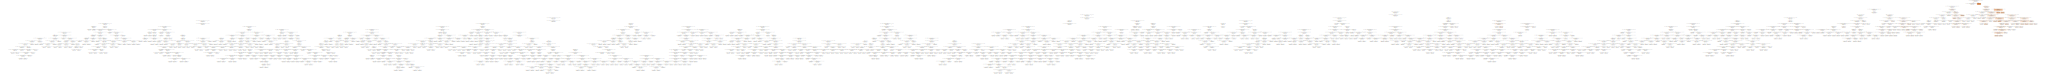

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from graphviz import Source
from IPython.display import SVG

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(regressor, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# # Create a graph from the classifier
# graph = Source(tree.export_graphviz(regressor, out_file=None,
#                                     feature_names=X_train.columns,
#                                     filled=True))

# # Display the graph in Colab
# display(SVG(graph.pipe(format='svg')))

In [ ]:
# visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plot_tree(clf, filled=True)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f871eb0de50> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f871eb0dd30> (for post_execute):


KeyboardInterrupt: ignored